In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from vocal_fold_model import twomass

Parameters estimation
Assuming the two sides are symmetric, m1 is the bottom portion and m2 is the upper portion of the vocal fold.
m1 = 0.01 g
m2 = 0.005 g
The dimensions are
d1 = 0.1 cm
d2 = 0.05 cm
l = 0.3 cm

k1 = 0.8 g/ms^2
k2 = 0.08 g/ms^2
kc = 0.25 g/ms^2

c1 = 3 * k1
c2 = 3 * k2

[1] H. Herzel et al 1995
[2] I. Steinecke and H. Herzel 1995
[3] H. Koda et al 2015

In [56]:
# Parameters
po = 1/4;     # which power law
Q = 100;        # scaling factor with respect to mass
dr = 0.00001          # dampling ratio
m1l = m1r = m1 = 0.01 * Q
m2l = m2r = m2 = 0.005 * Q
k1l = k1r = k1 = 5*Q**(po)
k2l = k2r = k2 = 2*Q**(po)
kcl = kcr = kc = 2*Q**(po)
c1l = c1r = c1 = 3*k1
c2l = c2r = c2 = 3*k2
r1l = r1r = r1 = 2*dr*(m1*k1)**0.5
r2l = r2r = r2 = 2*dr*(m2*k2)**0.5
a10 = a20 = 0.05*Q**(2*po)
l = 0.3*Q**(po)
d1 =0.1*Q**(po)
d2 = 0.05*Q**(po)
Ps = 0.05

In [57]:
# Initialization
x1l0 = x1r0 = 0.1 
y1l0 = y1r0 = 0.1
x2l0 = x2r0 = 0.1
y2l0 = y2r0 = 0

In [58]:
# Bundle params
params = [m1l, m2l, m1r, m2r, k1l, k2l, k1r, k2r, 
    r1l, r2l, r1r, r2r, c1l, c2l, c1r, c2r,
    kcl, kcr, a10, a20, d1, d2, l, Ps]
# Bundle initial conditions
y0 = [x1l0,y1l0,x2l0,y2l0,x1r0,y1r0,x2r0,y2r0]

In [59]:
# Set time steps
t0 = 0.0
T = 50.
N = 10000
#t = np.arange(0., T, dt)
t = np.linspace(t0, T, N)

In [60]:
# call the ODE solver
psoln = odeint(twomass, y0, t, args=(params,))

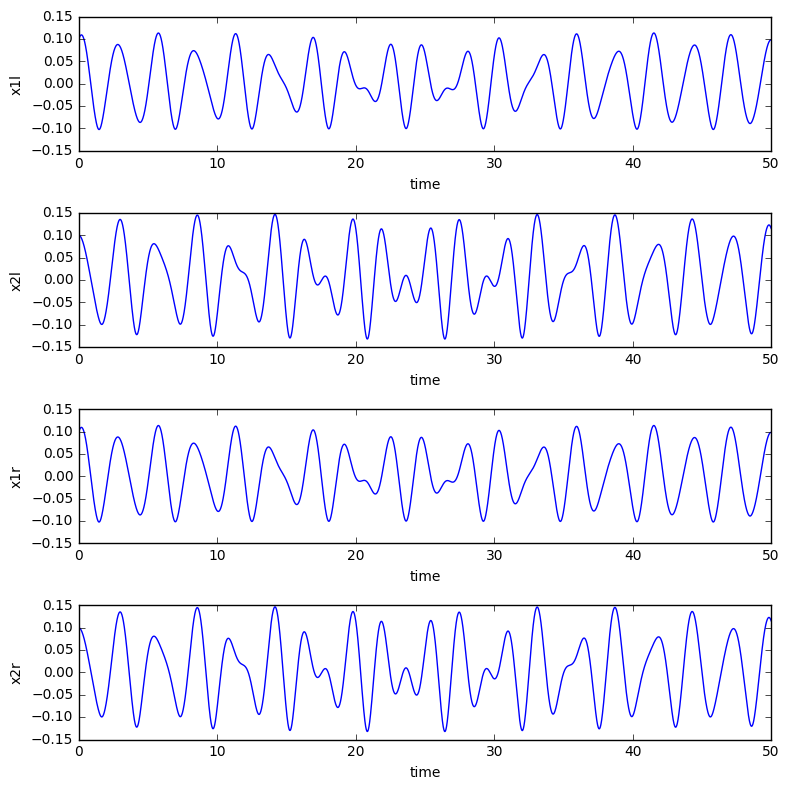

In [61]:
# Plot results
fig = plt.figure(1, figsize=(8,8))

# Plot x1l as a function of time
ax1l = fig.add_subplot(411)
ax1l.plot(t, psoln[:,0])
ax1l.set_xlabel('time')
ax1l.set_ylabel('x1l')

# Plot x2l as a function of time
ax2l = fig.add_subplot(412)
ax2l.plot(t, psoln[:,2])
ax2l.set_xlabel('time')
ax2l.set_ylabel('x2l')

# Plot x1r as a function of time
ax1r = fig.add_subplot(413)
ax1r.plot(t, psoln[:,4])
ax1r.set_xlabel('time')
ax1r.set_ylabel('x1r')

# Plot x2r as a function of time
ax2r = fig.add_subplot(414)
ax2r.plot(t, psoln[:,6])
ax2r.set_xlabel('time')
ax2r.set_ylabel('x2r')

plt.tight_layout()
plt.show()

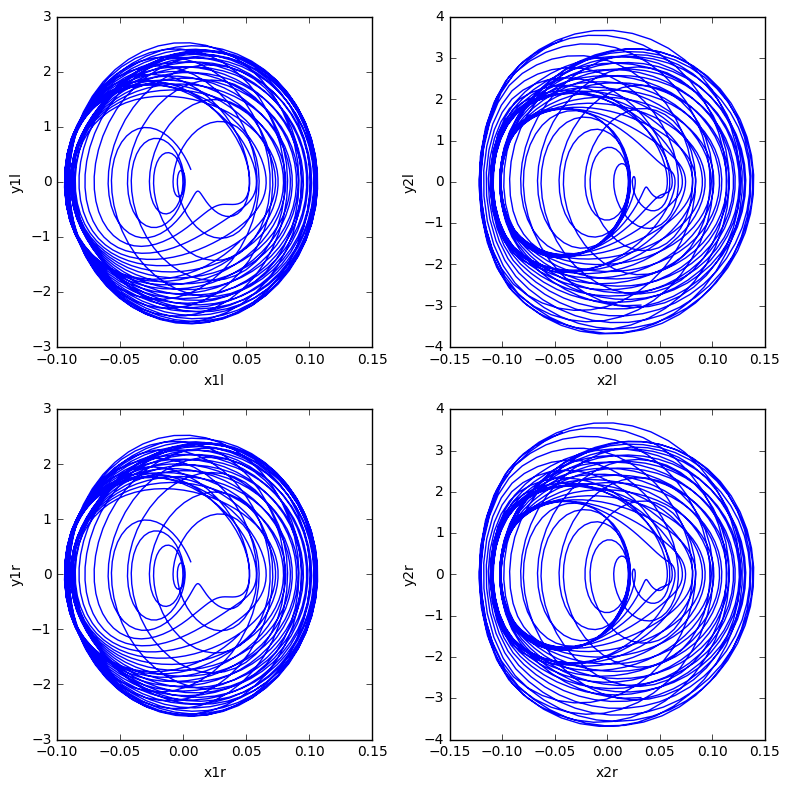

In [51]:
# Plot results
fig = plt.figure(1, figsize=(8,8))

# phase plot x1l
ax1l = fig.add_subplot(221)
ax1l.plot(psoln[-2000:,0], psoln[-2000:,1])
ax1l.set_xlabel('x1l')
ax1l.set_ylabel('y1l')

# phase plot x2l
ax2l = fig.add_subplot(222)
ax2l.plot(psoln[-2000:,2], psoln[-2000:,3])
ax2l.set_xlabel('x2l')
ax2l.set_ylabel('y2l')

# phase plot x1r
ax1r = fig.add_subplot(223)
ax1r.plot(psoln[-2000:,4], psoln[-2000:,5])
ax1r.set_xlabel('x1r')
ax1r.set_ylabel('y1r')

# phase plot x2r
ax2r = fig.add_subplot(224)
ax2r.plot(psoln[-2000:,6], psoln[-2000:,7])
ax2r.set_xlabel('x2r')
ax2r.set_ylabel('y2r')

plt.tight_layout()
plt.show()

In [62]:
# bifurcation diagram as a function of scaling factor Q
# define a function of parameters with respect to Q
from set_parameters import get_par_scale

QQ = np.arange(0.1, 100, 1)
# create empty tuples for x-crossing
xb1l = xb2l = xb1r = xb2r = {}
# how late to take
lm = N/2;
for Q in QQ:
    pars = get_par_scale(Q)
    y = odeint(twomass, y0, t, args=(pars,))
    # find zero-crossing for xdot
    zc = np.where(np.diff(np.sign(y[:,1])))[0]
    xb1l[Q] = y[zc[zc>lm],0]
    zc = np.where(np.diff(np.sign(y[:,3])))[0]
    xb2l[Q] = y[zc[zc>lm],2]
    zc = np.where(np.diff(np.sign(y[:,5])))[0]
    xb1r[Q] = y[zc[zc>lm],4]
    zc = np.where(np.diff(np.sign(y[:,7])))[0]
    xb2r[Q] = y[zc[zc>lm],4]

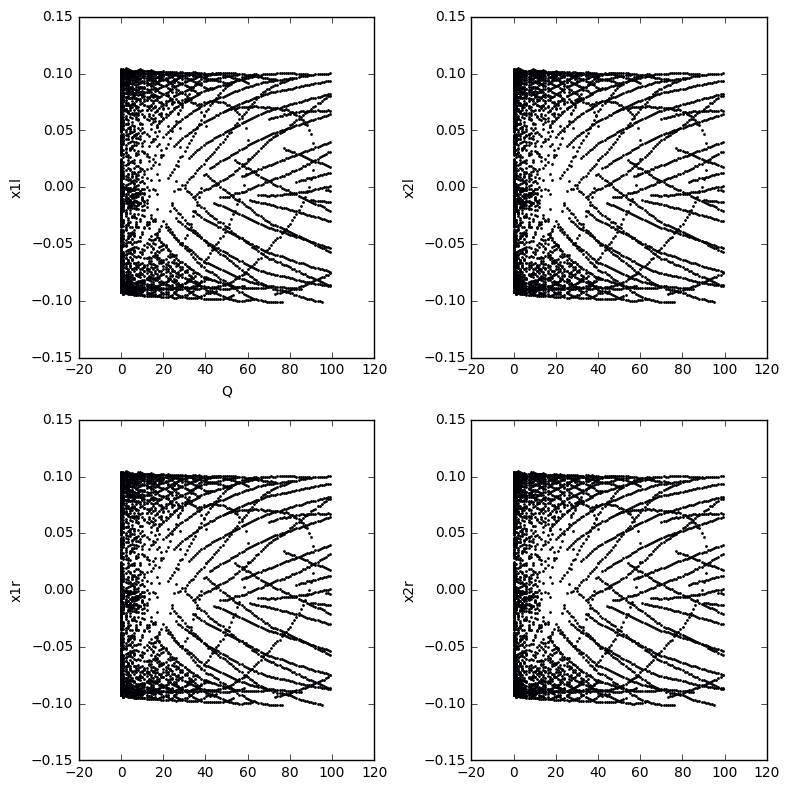

In [63]:
# Plot results
fig = plt.figure(1, figsize=(8,8))

# Feigenbaum plot x1l
ax1l = fig.add_subplot(221)
qq,xx = zip(*xb1l.items())
for q, x in zip(qq, xx):
    plt.scatter([q] * len(x), x, s=1)
ax1l.set_xlabel('Q')
ax1l.set_ylabel('x1l')

# Feigenbaum plot x2l
ax2l = fig.add_subplot(222)
qq,xx = zip(*xb2l.items())
for q, x in zip(qq, xx):
    plt.scatter([q] * len(x), x, s=1)
ax1l.set_xlabel('Q')
ax2l.set_ylabel('x2l')

# Feigenbaum plot x1r
ax1r = fig.add_subplot(223)
qq,xx = zip(*xb1r.items())
for q, x in zip(qq, xx):
    plt.scatter([q] * len(x), x, s=1)
ax1l.set_xlabel('Q')
ax1r.set_ylabel('x1r')

# Feigenbaum plot x2r
ax2r = fig.add_subplot(224)
qq,xx = zip(*xb2r.items())
for q, x in zip(qq, xx):
    plt.scatter([q] * len(x), x, s=1)
ax1l.set_xlabel('Q')
ax2r.set_ylabel('x2r')

plt.tight_layout()
plt.show()

In [65]:
!jupyter nbconvert --to script two_mass_model.ipynb

[NbConvertApp] Converting notebook two_mass_model.ipynb to script
[NbConvertApp] Writing 4496 bytes to two_mass_model.py
